# Introduction

The focus of this notebook will be on implementation of linear regression from scratch. The key issue is to forecast the how much time an woman athlete will take to complete 100 Meter race, base don historical trends.hence it is a very rough idea to determine of what will be happened.

Source:https://github.com/vivolscute/Machine-learning-Deep-Learning-Python-Hand-written-notes-and-notebooks/blob/main/notebooks/data/DataWoman.csv

# What is the problem statement?

dataset is given :

The goal is to create a simple forecast of the year given by the client/user and hence the time taken by woman athlete and it's performance by understanding the link between year and their impact of time(sec) taken by woman athlete using linear Model from scratch.

# Assumptions made

That time taken by woman athlete moves purely based on year. However, we understand that time taken by woman athlete can be affected by multiple different reasons and analysts often obtain information much earlier that journalists.

# Steps

1.    Import dataset and required libraries
2.    Perform EDA
3.    Plot Graphs to take maximum insights from data
4.    Create linear regression model from scratch and compare results with sklearn.linear_model
5.    take year as input from user and forcast time taken by woman athlete to complete 100 meter race.

# Linear Regression from scratch

# Made with ❤️️ and  ☕ 
## by Vivek patel
###  ER.No : 202003103510159

## import required libraries

In [1]:
import numpy  as np
import pandas as pd

## import dataset

In [2]:
df = pd.read_csv('DataWoman.csv')

## Let's take a Quick look on our data

In [3]:
df.head()

,X,Y
0,1928,12.20
1,1932,11.90
2,1936,11.15
3,1948,11.90
4,1952,11.50


In [4]:
df.tail()

,X,Y
16,2000,11.12
17,2004,10.93
18,2008,10.78
19,2012,10.75
20,2016,10.71


In [5]:
df.shape

(21, 2)

In [6]:
df.describe()

,X,Y
count,21.000000,21.000000
mean,1974.857143,11.158095
std,26.657618,0.429844
min,1928.000000,10.540000
25%,1956.000000,10.930000
50%,1976.000000,11.060000
75%,1996.000000,11.400000
max,2016.000000,12.200000


## Let's Plot Data and take insights

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Time taken(sec)')]

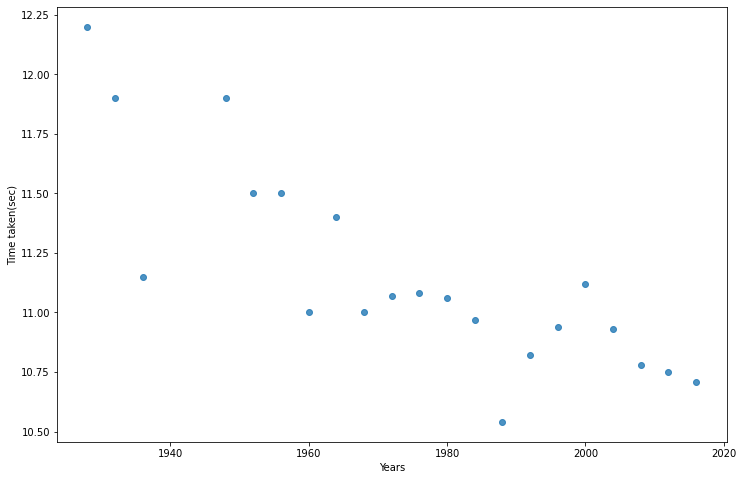

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12,8))
ax = sns.regplot(x=df['X'],y=df['Y'],marker="o",fit_reg=False)
ax.set(xlabel="Years", ylabel = "Time taken(sec)")

## sum of all elements in X column

In [8]:
X = df['X']
sum1 = 0
for i in range(len(df['X'])):
    sum1 += X[i]
sum1

41472

## sum of all elements in Y column

In [9]:
Y = df['Y']
sum2 = 0
for i in range(len(df['Y'])):
    sum2 += Y[i]
sum2

234.32

## Lets Plot heatmap of our Dataset

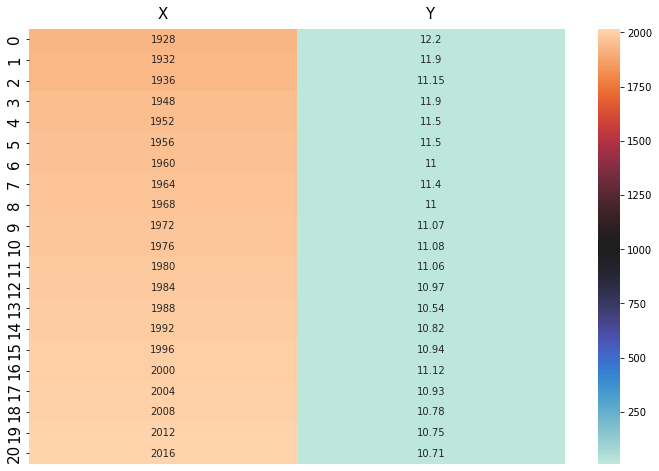

In [10]:
fig, ax = plt.subplots(1, figsize=(12,8))
plt.tick_params(axis='both', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True)
ax = sns.heatmap(data=df,cmap="icefire",annot=True,fmt='g')

## Lets find xBar(mean)

In [11]:
xBar = sum1 / len(df['X'])

In [12]:
xBar

1974.857142857143

## Lets find yBar(mean)

In [13]:
yBar = sum2 / len(df['Y'])

In [14]:
yBar

11.158095238095237

## Lets Find x - xBar For every element

In [15]:
xMin_xBar = []
for i in range(len(df['X'])):
    xMin_xBar.append(X[i]-xBar)  

In [16]:
xMin_xBar

[-46.85714285714289,
 -42.85714285714289,
 -38.85714285714289,
 -26.85714285714289,
 -22.85714285714289,
 -18.85714285714289,
 -14.85714285714289,
 -10.85714285714289,
 -6.85714285714289,
 -2.8571428571428896,
 1.1428571428571104,
 5.14285714285711,
 9.14285714285711,
 13.14285714285711,
 17.14285714285711,
 21.14285714285711,
 25.14285714285711,
 29.14285714285711,
 33.14285714285711,
 37.14285714285711,
 41.14285714285711]

## Lets add a new column to our data frame called 'X-x̄' 

In [17]:
df['X-x̄'] = xMin_xBar

## Lets Convert xMin_xBar into numpy array 

In [18]:
xMin_xBar = np.array(xMin_xBar)

## Lets Find Y - yBar for every element

In [19]:
yMin_yBar = []
for i in range(len(df['Y'])):
    yMin_yBar.append(Y[i]-yBar)   

In [20]:
type(yMin_yBar)

list

## Lets add a new column to our data frame called 'Y-ȳ'

In [21]:
df['Y-ȳ'] = yMin_yBar

## Lets find upper part of Equation
### Which is  x - xBar * y - yBar

In [22]:
upper = xMin_xBar * yMin_yBar
upper

array([-48.82068027, -31.79591837,   0.31455782, -19.92544218,
        -7.81496599,  -6.44734694,   2.34884354,  -2.62639456,
         1.08408163,   0.25170068,  -0.0892517 ,  -0.5044898 ,
        -1.71972789,  -8.12353741,  -5.79591837,  -4.61115646,
        -0.95782313,  -6.64734694, -12.53115646, -15.15782313,
       -18.43591837])

## Lets add a new column to our data frame called ''(X-x̄)*(Y-ȳ')

In [23]:
df["(X-x̄)*(Y-ȳ)"] = upper

## Lets find lower part of Equation
### Which is  X - Xbar`2

In [24]:
lower = xMin_xBar * xMin_xBar
lower

array([2.19559184e+03, 1.83673469e+03, 1.50987755e+03, 7.21306122e+02,
       5.22448980e+02, 3.55591837e+02, 2.20734694e+02, 1.17877551e+02,
       4.70204082e+01, 8.16326531e+00, 1.30612245e+00, 2.64489796e+01,
       8.35918367e+01, 1.72734694e+02, 2.93877551e+02, 4.47020408e+02,
       6.32163265e+02, 8.49306122e+02, 1.09844898e+03, 1.37959184e+03,
       1.69273469e+03])

## Lets add a new column to our data frame called 'X-x̄^2'

In [25]:
df["X-x̄^2"] = lower

In [26]:
df.head()

,X,Y,X-x̄,Y-ȳ,(X-x̄)*(Y-ȳ),X-x̄^2
0,1928,12.20,-46.857143,1.041905,-48.820680,2195.591837
1,1932,11.90,-42.857143,0.741905,-31.795918,1836.734694
2,1936,11.15,-38.857143,-0.008095,0.314558,1509.877551
3,1948,11.90,-26.857143,0.741905,-19.925442,721.306122
4,1952,11.50,-22.857143,0.341905,-7.814966,522.448980


In [27]:
df.tail()

,X,Y,X-x̄,Y-ȳ,(X-x̄)*(Y-ȳ),X-x̄^2
16,2000,11.12,25.142857,-0.038095,-0.957823,632.163265
17,2004,10.93,29.142857,-0.228095,-6.647347,849.306122
18,2008,10.78,33.142857,-0.378095,-12.531156,1098.448980
19,2012,10.75,37.142857,-0.408095,-15.157823,1379.591837
20,2016,10.71,41.142857,-0.448095,-18.435918,1692.734694


In [28]:
df.shape

(21, 6)

## Lets Plot heat map and Closely take a look on X-x̄^2 column

<AxesSubplot:>

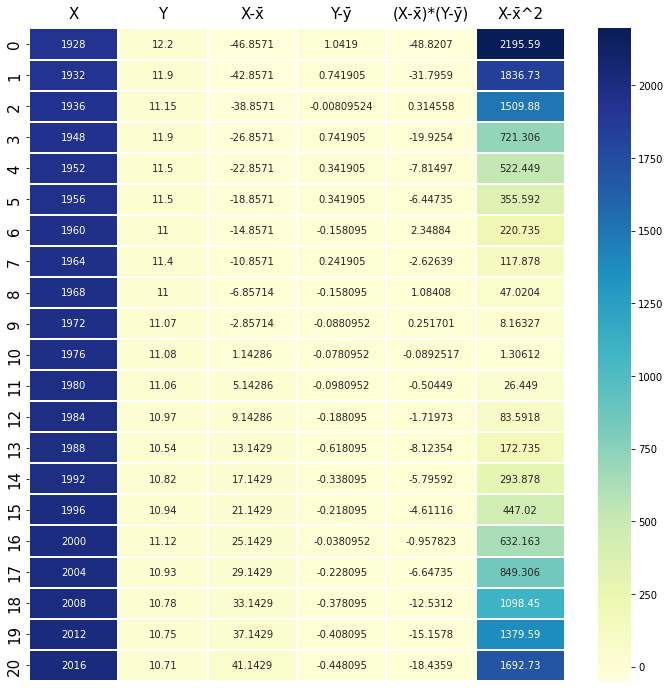

In [29]:
fig, ax = plt.subplots(1, figsize=(12,12))
plt.tick_params(axis='both', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(df, annot=True,cmap="YlGnBu",fmt='g', linewidths=.3)

## Lets Find sum of upper array

In [30]:
upperSum = 0
for i in range(len(upper)):
    upperSum+=upper[i]
upperSum

-188.0057142857143

## Lets Find sum of lower array

In [31]:
lowerSum = 0
for i in range(len(lower)):
    lowerSum+=lower[i]
lowerSum

14212.571428571424

## Lets Find B1(Coefficient)

In [32]:
B1 = upperSum / lowerSum
B1

-0.013228128015439053

In [33]:
B1 

-0.013228128015439053

## Lets find B0(intercept)

In [34]:
B0 = yBar - B1 * xBar

In [35]:
B0

37.28175833601373

## Let's plot our line of best fit

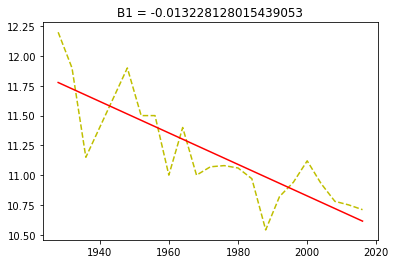

In [36]:
# Create a list of values in the best fit line
abline_values = [B1 * i + B0 for i in df['X']]
# Plot the best fit line over the actual values
plt.plot(X, Y, '--',c='y')
plt.plot(X, abline_values, c='r')
plt.title("B1 = "+str(B1))
plt.show()

## and Finnaly we got our forcasted value with mean

In [37]:
yPred = B0 + B1 * xBar

In [38]:
yPred

11.158095238095235

## let's find R'2
### it defines how well our line is fitted towards data points

## let's find sigma X

In [39]:
sigX = lowerSum / len(X)

In [40]:
sigX

676.7891156462583

## let's find sigma Y

In [41]:
yMin_yBar = np.array(yMin_yBar)

In [42]:
yMin_yBar_Sqr = yMin_yBar * yMin_yBar 

In [43]:
yMin_yBar_Sqr_sum = 0
for i in range(len(yMin_yBar_Sqr)):
    yMin_yBar_Sqr_sum+=yMin_yBar_Sqr[i]
yMin_yBar_Sqr_sum

3.695323809523811

In [44]:
sigY = yMin_yBar_Sqr_sum * 1 / len(Y)

In [45]:
sigY

0.1759678004535148

# Finnaly Let's Find R'2(Coefficient of Determination)

In [46]:
R_Square = np.square(upperSum*(1/len(df['X'])))/(sigX * sigY)

In [47]:
R_Square

0.6730029043181371

## Let's plot regression plot using seaborn

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Time taken (sec)')]

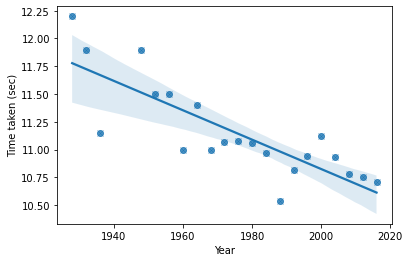

In [48]:
ax = sns.regplot(x=X,y=Y,data=df)
ax = sns.scatterplot(x=df['X'],y=df['Y'],marker='x')
ax.set(xlabel="Year", ylabel = "Time taken (sec)")

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg = LinearRegression().fit(df[['X']],df['Y'])

In [51]:
reg.intercept_

37.28175833601373

In [52]:
B0

37.28175833601373

In [53]:
reg.coef_

array([-0.01322813])

In [54]:
B1

-0.013228128015439053

In [55]:
correlation_matrix = np.corrcoef(X, Y)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2
r_squared

0.6730029043181373

In [56]:
R_Square

0.6730029043181371

<table class="dcf-table dcf-table-responsive dcf-table-bordered dcf-table-striped dcf-w-100%">
	<thead>
        <caption>comparison</caption>
		<tr>
			<th class="dcf-txt-center" scope="col">Sr No.</th>
			<th class="dcf-txt-center" scope="col">Var</th>
			<th class="dcf-txt-center" scope="col">Value</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th class="dcf-txt-center" scope="row">1</th>
			<td class="dcf-txt-center" data-label="Var">x̄</td>
			<td class="dcf-txt-center" data-label="Value">1974.857142857143</td>
		</tr>
		<tr>
			<th class="dcf-txt-center" scope="row">2</th>
			<td class="dcf-txt-center" data-label="Var">ȳ</td>
			<td class="dcf-txt-center" data-label="Value">11.158095238095237</td>
		</tr>
		<tr>
			<th class="dcf-txt-center" scope="row"></th>
			<td class="dcf-txt-center" data-label="Var"></td>
			<td class="dcf-txt-center" data-label="Value"></td>
		</tr>
	</tbody>
</table>

<table class="dcf-table dcf-table-responsive dcf-table-bordered dcf-table-striped dcf-w-100%">
	<caption>comparison</caption>
	<thead>
		<tr>
			<th scope="col">Sr No.</th>
			<th scope="col">Values</th>
			<th scope="col">Without Sklearn</th>
			<th scope="col">Using Sklearn</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<th scope="row">1</th>
			<td data-label="Var">B0(intercept)</td>
			<td data-label="Without Sk learn">37.28175833601373</td>
			<td data-label="Using Sklearn">37.28175833601373</td>
		</tr>
		<tr>
			<th scope="row">2</th>
			<td data-label="Var">B1(Coefficient)</td>
			<td data-label="Without Sk learn">-0.013228128015439053</td>
			<td data-label="Using Sklearn">-0.01322813
</td>
		</tr>
		<tr>
			<th scope="row">3</th>
			<td data-label="Var">R^2(Coefficient of Determination)</td>
			<td data-label="Without Sk learn">0.6730029043181371</td>
			<td data-label="Using Sklearn">0.6730029043181373</td>
		</tr>
	</tbody>
</table>

In [57]:
inp = int(input("enter year :- "))
Yhat = B0 + B1 * inp
print(str(Yhat)+" Sec (estimated)")

enter year :- 2021
10.547711616811405 Sec (estimated)


## Results are finaly here 
our model is very much closer to forcat exact value for year 2020 which is 10:61, breaking the Olympic Record by 0.01 seconds. Shelly-Ann Fraser-Pryce came second at 10:74 with Shericka Jackson at 10:76.

Source : https://economictimes.indiatimes.com/news/sports/tokyo-olympics-2020-jamaicas-elaine-thompson-herah-wins-womens-100m-race-breaks-flo-jos-olympic-record/videoshow/84929018.cms

Looking in links: https://download.pytorch.org/whl/torch_stable.html


,X,Y
0,1928,12.20
1,1932,11.90
2,1936,11.15
3,1948,11.90
4,1952,11.50


21


2


['X']

(array([[1928],
        [1932],
        [1936],
        [1948],
        [1952],
        [1956],
        [1960],
        [1964],
        [1968],
        [1972],
        [1976],
        [1980],
        [1984],
        [1988],
        [1992],
        [1996],
        [2000],
        [2004],
        [2008],
        [2012],
        [2016]]),
 array([[12.2 ],
        [11.9 ],
        [11.15],
        [11.9 ],
        [11.5 ],
        [11.5 ],
        [11.  ],
        [11.4 ],
        [11.  ],
        [11.07],
        [11.08],
        [11.06],
        [10.97],
        [10.54],
        [10.82],
        [10.94],
        [11.12],
        [10.93],
        [10.78],
        [10.75],
        [10.71]]))

(torch.float32, torch.float32)

18

torch.utils.data.dataset.TensorDataset

inputs: tensor([[1956.],
        [1996.],
        [1936.]])
targets: tensor([[11.5000],
        [10.9400],
        [11.1500]])


[Parameter containing:
 tensor([[-0.0549]], requires_grad=True),
 Parameter containing:
 tensor([0.4464], requires_grad=True)]

118.70855712890625


Epoch [20], val_loss: 1062.7054
Epoch [40], val_loss: 5859.9453
Epoch [60], val_loss: 4391.4868
Epoch [80], val_loss: 5492.8149
Epoch [100], val_loss: 8587.0303


Epoch [20], val_loss: 961.6049
Epoch [40], val_loss: 977.3387
Epoch [60], val_loss: 835.7385
Epoch [80], val_loss: 1307.7372
Epoch [100], val_loss: 1223.8276


Epoch [20], val_loss: 309.6484
Epoch [40], val_loss: 320.1374
Epoch [60], val_loss: 343.7375
Epoch [80], val_loss: 293.3907
Epoch [100], val_loss: 312.7951


Epoch [20], val_loss: 23.3739
Epoch [40], val_loss: 20.8041
Epoch [60], val_loss: 20.2272
Epoch [80], val_loss: 22.6397
Epoch [100], val_loss: 20.8041
Epoch [120], val_loss: 16.1366
Epoch [140], val_loss: 10.2628
Epoch [160], val_loss: 0.6987
Epoch [180], val_loss: 23.5639
Epoch [200], val_loss: 31.1159
Epoch [220], val_loss: 32.5844
Epoch [240], val_loss: 12.4981
Epoch [260], val_loss: 15.1728
Epoch [280], val_loss: 21.5710
Epoch [300], val_loss: 24.6128
Epoch [320], val_loss: 22.9870
Epoch [340], val_loss: 13.0226
Epoch [360], val_loss: 14.6483
Epoch [380], val_loss: 8.6172
Epoch [400], val_loss: 1.6945
Epoch [420], val_loss: 4.4741
Epoch [440], val_loss: 27.2874
Epoch [460], val_loss: 26.3434
Epoch [480], val_loss: 26.1861
Epoch [500], val_loss: 27.1825
Epoch [520], val_loss: 27.8643
Epoch [540], val_loss: 30.5389
Epoch [560], val_loss: 29.3852
Epoch [580], val_loss: 27.7069
Epoch [600], val_loss: 25.7141
Epoch [620], val_loss: 24.9798
Epoch [640], val_loss: 30.4865
Epoch [660], val

Epoch [20], val_loss: 1.3378
Epoch [40], val_loss: 0.7819
Epoch [60], val_loss: 1.9504
Epoch [80], val_loss: 1.9662
Epoch [100], val_loss: 1.2792
Epoch [120], val_loss: 1.1166
Epoch [140], val_loss: 1.8413
Epoch [160], val_loss: 1.4112
Epoch [180], val_loss: 1.4322
Epoch [200], val_loss: 1.7364
Epoch [220], val_loss: 1.9462
Epoch [240], val_loss: 2.4077
Epoch [260], val_loss: 2.3500
Epoch [280], val_loss: 2.0721
Epoch [300], val_loss: 2.6070
Epoch [320], val_loss: 2.5798
Epoch [340], val_loss: 2.5326
Epoch [360], val_loss: 2.1497
Epoch [380], val_loss: 2.3647
Epoch [400], val_loss: 2.5745
Epoch [420], val_loss: 2.6217
Epoch [440], val_loss: 2.4382
Epoch [460], val_loss: 1.9399
Epoch [480], val_loss: 1.9871
Epoch [500], val_loss: 1.6200
Epoch [520], val_loss: 1.5991
Epoch [540], val_loss: 1.4322
Epoch [560], val_loss: 1.2434
Epoch [580], val_loss: 1.1648
Epoch [600], val_loss: 1.3116
Epoch [620], val_loss: 0.8711
Epoch [640], val_loss: 1.1438
Epoch [660], val_loss: 0.8711
Epoch [680], v

Epoch [20], val_loss: 0.4741
Epoch [40], val_loss: 0.4548
Epoch [60], val_loss: 0.5209
Epoch [80], val_loss: 0.5061
Epoch [100], val_loss: 0.4745


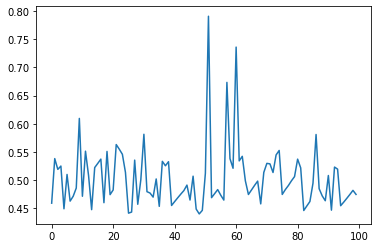

Input: tensor([1960.])
Target: tensor([11.])
Prediction: tensor(11.1041)


Input: tensor([1960.])
Target: tensor([11.])
Prediction: tensor(11.1041)


In [105]:
val_ds[0]

(tensor([1960.]), tensor([11.]))

In [106]:
val_ds

Input: tensor([2021.])
Prediction: tensor(11.4358)
